In [1]:
import pandas as pd
import janitor as jn
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import ECDF

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/ericmjl/anaconda/envs/bayesian-modelling-tutorial/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Darwin's Finches

A research group has taken measurements of the descendants of the finches that Charles Darwin observed when he postulated the theory of evolution.

We will be using Bayesian methods to analyze this data, specifically answering the question of how quantitatively different two species of birds' beaks are.

## Data Credits

The Darwin's finches datasets come from the paper, [40 years of evolution. Darwin's finches on Daphne Major Island][data]. 

One row of data has been added for pedagogical purposes.

[data]: (https://datadryad.org/resource/doi:10.5061/dryad.g6g3h). 

Let's get started and load the data.

In [2]:
from data import load_finches_2012
df = load_finches_2012()

### Exercise

View a random sample of the data to get a feel for the structure of the dataset.

In [3]:
# Your code below


,band,species,beak_length,beak_depth,species_enc
151,19466,scandens,12.3,8.2,1
144,19406,scandens,12.0,8.0,1
85,21087,fortis,12.9,9.9,0
10,19121,fortis,10.1,8.0,0
176,19622,scandens,13.2,9.3,1


**Note:** I have added one row of data, simulating the discovery of an "unknown" species of finch for which beak measurements have been taken.

For pedagogical brevity, we will analyze only beak depth during the class. However, I would encourage you to perform a similar analysis for beak length as well.

In [4]:
# These are filters that we can use later on.
fortis_filter = df['species'] == 'fortis'
scandens_filter = df['species'] == 'scandens'
unknown_filter = df['species'] == 'unknown'

### Exercise

Recreate the estimation model for finch beak depths. A few things to note:

- Practice using numpy-like fancy indexing.
- Difference of means & effect size are optional.

In [5]:
with pm.Model() as beak_depth_model:

    # Your model defined here.


### Exercise

Perform MCMC sampling to estimate the posterior distribution of each parameter.

In [6]:
# Your code below.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu_log__, sd_log__, mean_log__]
100%|██████████| 2500/2500 [00:25<00:00, 98.38it/s]
The acceptance probability does not match the target. It is 0.888855967203772, but should be close to 0.8. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


### Exercise

Diagnose whether the sampling has converged or not using trace plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116419080>,
      dtype=object)

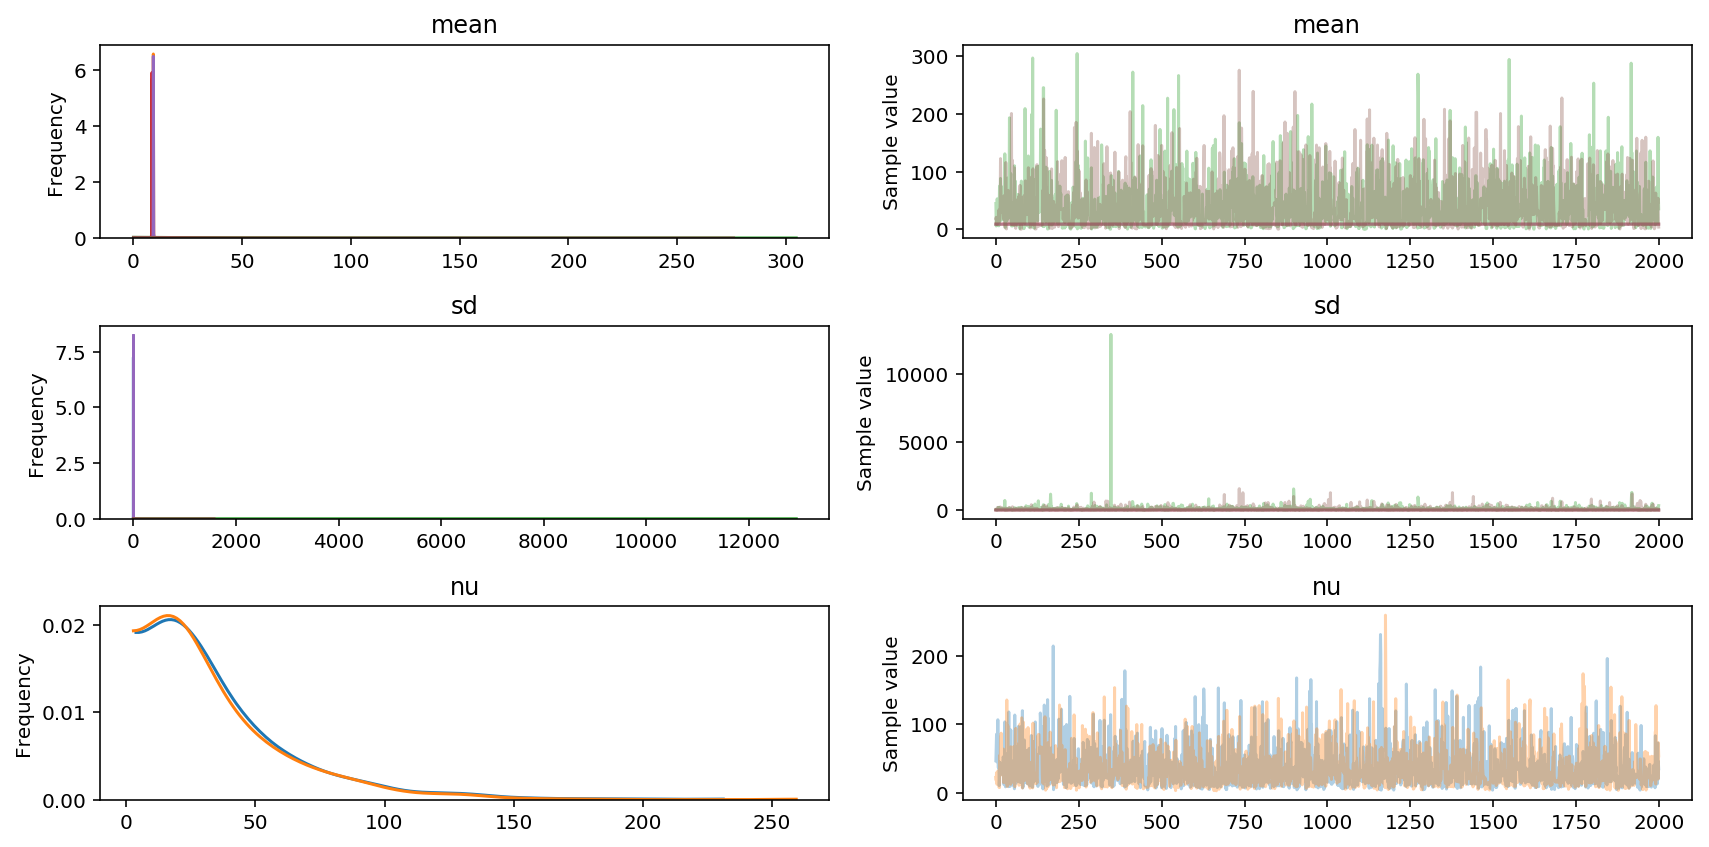

In [7]:
# Your code below.


### Exercise

Visualize the posterior distribution over the parameters using the forest plot.

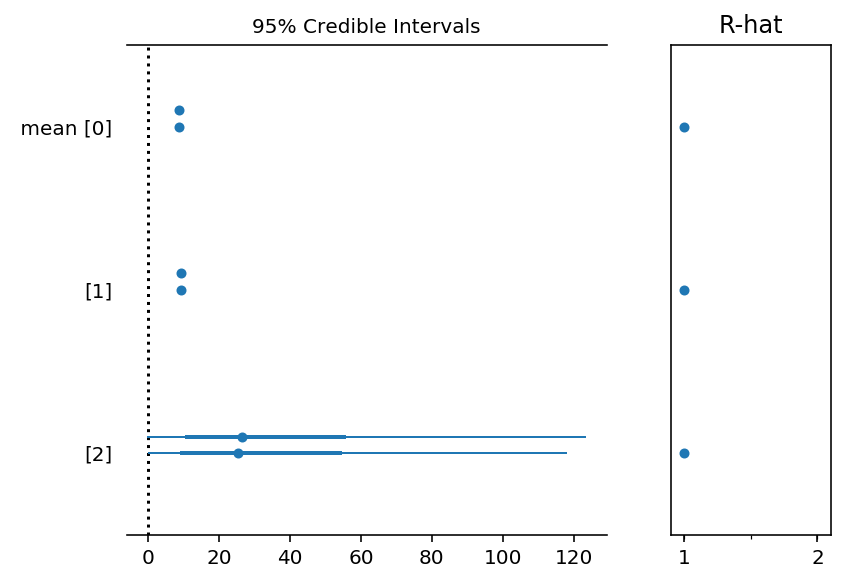

In [8]:
# Your code below.


### Exercise

Visualize the posterior distribution of the means. 

Text(0.5,1,'unknown')

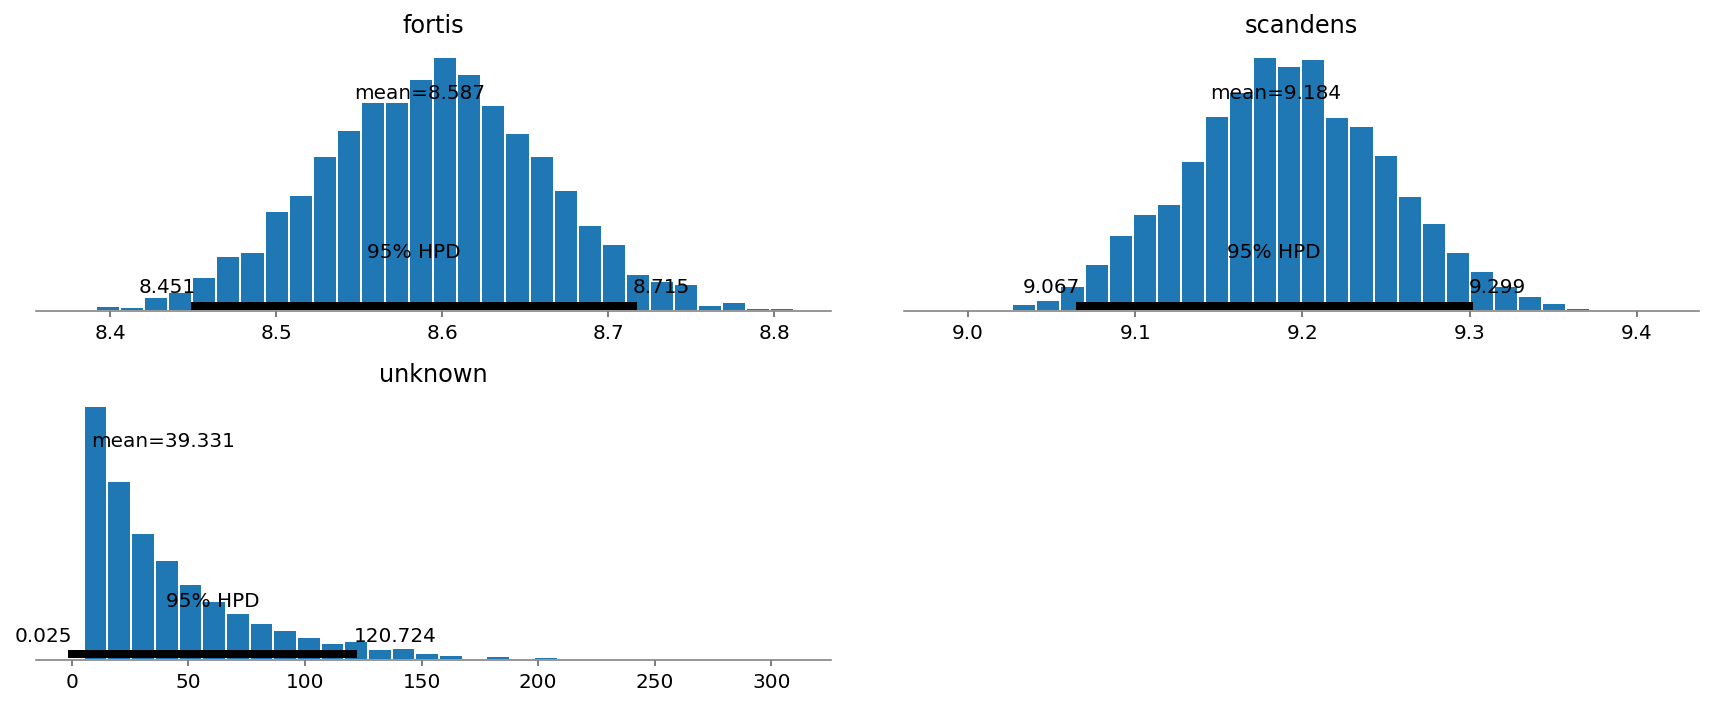

In [9]:
# Your code below.


### Discuss

- Is the posterior distribution of beaks for the unknown species reasonable?

### Exericse

Perform a posterior predictive check to visually diagnose whether the model describes the data generating process well or not.

In [10]:
samples = pm.sample_ppc(trace, model=beak_depth_model, samples=2000)

100%|██████████| 2000/2000 [00:01<00:00, 1756.66it/s]


Hint: Each column in the samples (key: "likelihood") corresponds to simulated measurements of each finch in the dataset. We can use fancy indexing along the columns (axis 1) to select out simulated measurements for each category, and then flatten the resultant array to get the full estimated distribution of values for each class.

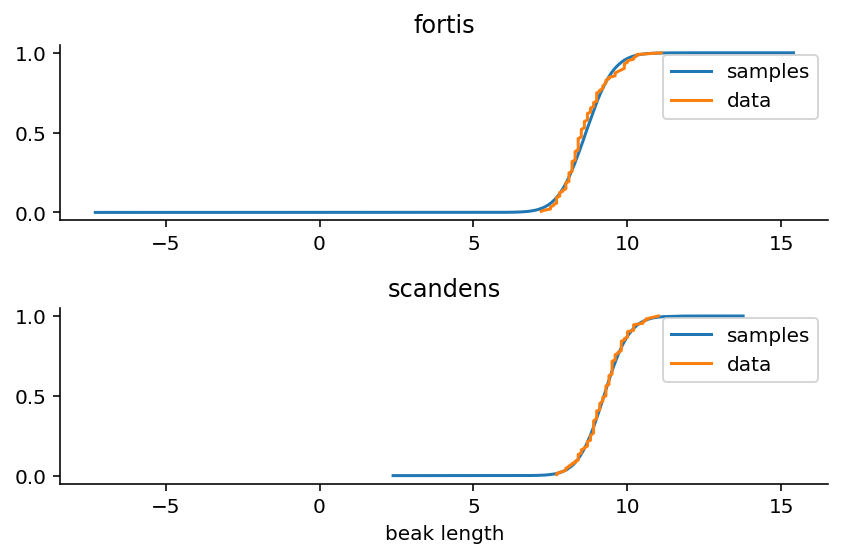

In [11]:
fig = plt.figure()
ax_fortis = fig.add_subplot(2, 1, 1)
ax_scandens = fig.add_subplot(2, 1, 2, sharex=ax_fortis)

# Extract just the fortis samples.

# Compute the ECDF for the fortis samples.

ax_fortis.plot(x_s, y_s, label='samples')

# Extract just the fortis measurements.

# Compute the ECDF for the fortis measurements.

ax_fortis.plot(x, y, label='data')

ax_fortis.legend()
ax_fortis.set_title('fortis')

# Extract just the scandens samples.

# Compute the ECDF for the scandens samples

ax_scandens.plot(x_s, y_s, label='samples')

# Extract just the scandens measurements.

# Compute the ECDF for the scanens measurements.


ax_scandens.plot(x, y, label='data')
ax_scandens.legend()
ax_scandens.set_title('scandens')
ax_scandens.set_xlabel('beak length')

sns.despine()
plt.tight_layout()

## Summary

1. NumPy-like fancy indexing lets us write models in a concise fashion.
1. Posterior estimates can show up as being "unreasonable", "absurd", or at the minimum, counter-intuitive, if we do not impose the right set of assumptions on the model.
